# Logistic Regrssion From Scratch

Logistic Regression is an algorithm which is used in **classification problems**. It is a generalized linear model that we can use to model or predict categorical outcome variables. 

For example, we might use logistic regression to predict whether someone has cancer or not depending upon the size of the tumor. 

<img src="files/graph_example.png">

The above graph is a dummy representation for our example, where 0 represents absence of cancer and 1, its contrary. Using Logistic regression, we can determine the decision boundary for classifying the tumor as cancerous or not depending upon the size of the tumor.


Before we start, some basics:
1. **Weight** of each feature is represented by $\theta$
2. Hypothesis Function **h(x)** represents the function used to predict a label based upon the value of $\theta$ and X (Input)
3. Now, given a training set, how do we pick, or learn, the parameters $\theta$? One reasonable method seems to be to make h(x) close to y, at least for the training examples we have. To formalize this, we will define a function that measures, for each value of the $\theta$ ’s, how close the h(x)'s are to the corresponding y's. Such a function is know nas **Cost Function**
4. **Objective:** To minimize the cost function.

## Generating Dummy Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

num_observations = 7000

x1 = np.random.multivariate_normal([0, 0], [[1, .8],[.8, 1]], num_observations)
x2 = np.random.multivariate_normal([2, 5], [[1, .8],[.8, 1]], num_observations)

simulated_dataset = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

Visualizing the data

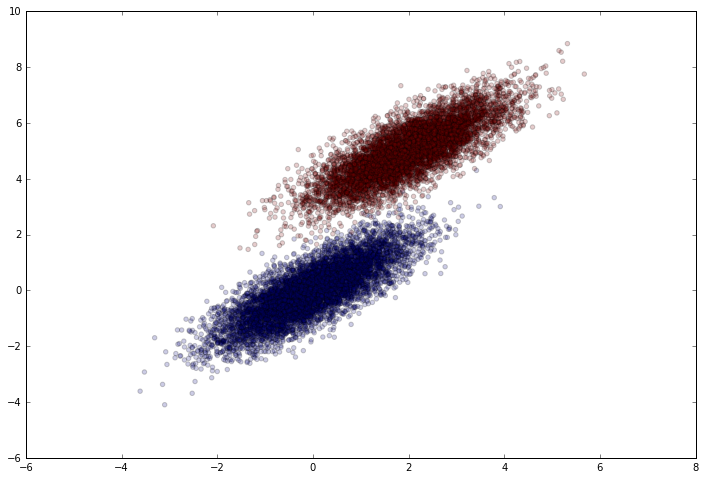

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_dataset[:, 0], simulated_dataset[:, 1],c = simulated_labels, alpha = .2)

## Logistic Function


Logistic Function, or Sigmoid Function is used in Logistic Regression to model how probability of an event is modelled by one or more variables (features). A sigmoid function is a bounded differentiable real function that is defined for all real input values and has a non-negative derivative at each point. 

### **Equation:** g(z) = $\frac{1}{1 + e^{ -z}}$

The function when plotted, looks like:

<img src = "files/sigmoid.png">

Defining the sigmoid function:

In [21]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

Deifning our hypothesis Function:

### z = $\theta^T$x

### __h$_\theta$(x) = g(z)__  = $\frac{1}{1 + e^{-\theta^Tx}}$

Notice that g(z) tends towards 1 as z → ∞, and g(z) tends towards 0 as z → −∞. Moreover, g(z), and hence also h(x), is always bounded between 0 and 1. Here, like in Linear Regression $x_0$ = 1, so that 

### $\theta^Tx = \theta_0 + \sum_{j=1}^{n} \theta_jx_j$

## A Useful Property

### Derivative of Sigmoid

### $g^{'}(z) = \frac{d}{dz} \frac{1}{1 + e^{-z}}$
### $g^{'}(z) = \frac{e^{-z}}{(1 + e^{-z})^2}$
### $g^{'}(z) = \frac{1}{(1 + e^{-z})} \times (1 - \frac{1}{(1 + e^{-z})})$
### $g^{'}(z) = g(z).(1 - g(z))$

So, given the logistic regression model, how do we fit $\theta$ for it? Let’s endow our classification model with a set of probabilistic assumptions, and then fit the parameters via maximum likelihood.
Let us assume that

### P(y = 1 | x; θ) = h$_\theta$(x)

### P(y = 0 | x; θ) = 1 − h$_\theta$(x)

This can be written more compactly as

### P(y | X; $\theta$) = [h$_\theta$(x)]$^y$[ 1 − h$_\theta$(x)]$^{1-y}$ 

Assuming that the m training examples were generated inindependently, we can then write down the likelihood of the parameters as

### L($\theta$) = p(y | X;  $\theta$)
### L($\theta$) = $\prod_{i = 1}^{m}$ p(y$^{(i)}$ | x$^{(i)}$;  $\theta$)
### L($\theta$) = $\prod_{i = 1}^{m}$ [h$_\theta(x^{(i)})$]$^{y^{(i)}}$  [1 − h$_\theta(x^{(i)})$]$^{1-y^{(i)}}$ 

It will be easier to maximize log likelihood. 

### l($\theta$) = $\sum_{i = 1}^{m}log(h_\theta(x^{(i)}))y^{(i)} + log(1 − h_\theta(x^{(i)}))(1-y^{(i)})$ 

Similar to our derivation in the case of linear regression, we can use gradient ascent. Written in vectorial notation, our updates will therefore be given by **θ := θ + α∇θℓ(θ)**. (Note the positive rather than negative sign in the update formula, since we’re maximizing, rather than minimizing, a function now.) Let’s start by working with just one training example (x, y), and take derivatives to derive the stochastic gradient ascent rule:

### $\frac{\partial}{\partial \theta_j}$ l($\theta$) = $(y\frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{1-g(\theta^Tx)})\frac{\partial}{\partial \theta_j}g(\theta^Tx)$
### $\frac{\partial}{\partial \theta_j}$ l($\theta$) = $(y\frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{1-g(\theta^Tx)})g(\theta^Tx)(1-g(\theta^Tx))\frac{\partial}{\partial \theta_j}\theta^Tx$
### $\frac{\partial}{\partial \theta_j}$ l($\theta$) = $(y(1-g(\theta^Tx)) - (1-y)g(\theta^Tx))x_j$
### $\frac{\partial}{\partial \theta_j}$ l($\theta$) = $(y - h_\theta(x))x_j$

Therefore for a single training example
### $\theta_j$ = $\theta_j + \alpha(y^{i} - h_\theta(x^{i}))x_j^{i}$

If we compare this to the Linear Regression update rule, we see that it looks identical; but this is not the same algorithm, because $h_\theta(x^i)$ is now defined as a non-linear function of $\theta^Tx$

In [8]:
from random import randrange

max_iter = 300000
learning_rate = 5e-5

intercept = np.ones((simulated_dataset.shape[0],1))
total_input = np.hstack((intercept, simulated_dataset))

#Initialization
theta = np.zeros(total_input.shape[1])

#Splitting dataset into testing and training dataset
train_input = []
train_labels = []
test_input = []
test_labels = []
size_train_x = int(0.8*len(total_input))


while len(train_input) <= size_train_x:
    index = randrange(len(total_input))
    entry = total_input[index]
    train_input.append(entry)
    train_labels.append(simulated_labels[index])
    np.delete(simulated_labels, index)
    np.delete(total_input, index)

i = 0
for row in total_input:
    test_input.append(row)
    test_labels.append(simulated_labels[i])
    i+=1

In [9]:
train_arr_data = np.array(train_input)
train_arr_labels = np.array(train_labels)
test_arr_data = np.array(test_input)
test_arr_labels = np.array(test_labels)

In [22]:
for iter in range(max_iter):
    current_val = np.dot(train_arr_data,theta)
    current_predictions = sigmoid(current_val)

    #Update Theta
    error = train_arr_labels - current_predictions
    gradient = np.dot(train_arr_data.T, error)
    theta += learning_rate * gradient


In [23]:
final_cost = np.dot(test_arr_data, theta)
prediction = np.round(sigmoid(final_cost))
print 'Accuracy: {0}'.format((prediction == test_arr_labels).sum().astype(float) / len(prediction))

Accuracy: 0.998357142857


## Comparing With SK Learn

In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(train_arr_data[:,1:3], train_arr_labels)

print clf.intercept_, clf.coef_
print theta


[-19.38628183] [[ -6.21905048  10.15003574]]
[-19.48134006  -6.24960996  10.20359866]


In [27]:
print 'Accuracy from sk-learn: {0}'.format((clf.score(test_arr_data[:,1:3], test_arr_labels)))


Accuracy from sk-learn: 0.998357142857


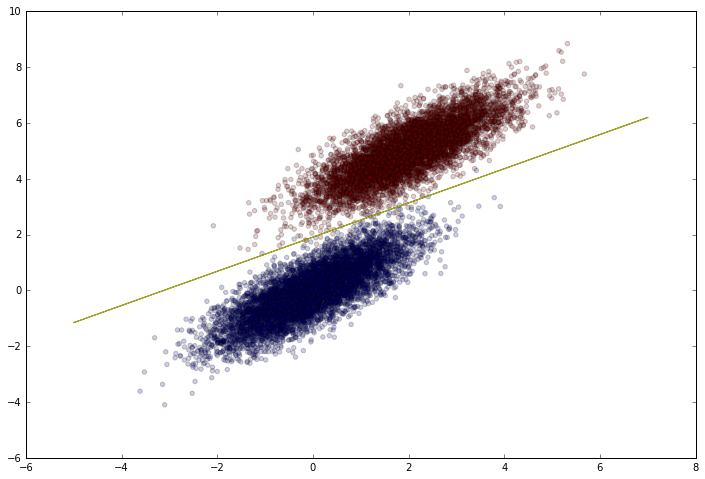

In [30]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 7)
yy = a * xx - (clf.intercept_[0]) / w[1]


a_2 = -theta[1]/theta[2]
y_2 = a_2 * xx - (theta[0]) / theta[2]
plt.figure(figsize = (12,8))
plt.scatter(simulated_dataset[:, 0], simulated_dataset[:, 1],c = simulated_labels, alpha = .2)
plt.plot(xx, yy, 'k-')
plt.plot(xx, y_2, 'y-')

## References
* Andrew Ng's Course on Machine Learning - CS 229
* Logistic Regression from Scratch (https://beckernick.github.io/logistic-regression-from-scratch/)